## Multiple Linear Regression

### Bike Sharing Case Study

* Problem Statement:

A US based bike-sharing company provides a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. The company recently suffered loss in their revenues due to ongoing Corona pandemic. The Bike Company wants prepare themselves to cater to people's need once situation gets better and now they want to understand how the independent variables impact the bike demands in the American Market. Basically the company wants to understand the demand dynamics so that they can plan better and make profit in the market.


In [1]:
# Importing the libraries for data understanding 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing libraries for model creation

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Step 1

### Reading and uderstading the bike sharing data
 * Look for data shape and size
 * Look for missing values or null values
 * Look for how data is described

In [3]:
# Reading the data using pandas read_csv method
bike_share_df = pd.read_csv('day.csv') 


In [4]:
# get dataframe shape and size information
bike_share_df.shape

(730, 16)

In [5]:
# Have a look how data looks like

bike_share_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Total we have total 730 rows and 16 columns 
# Except one column 'dteday' all are either int or float
# No null values are present in the dataset

# Now we can see there is no null values present in the data set
# lets have a look how data is distributed

bike_share_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Data cleaning or removing the columns that mayu not be required

# removing column instant, since it is index and will have unique values 

bike_share_df.instant.value_counts()

1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: instant, Length: 730, dtype: int64

In [8]:
# drop the instant columns 

bike_share_df = bike_share_df.drop(columns=['instant'], axis=1)

In [9]:
bike_share_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# drop the dteday column as well since we already have yr and month, we may need to convert yr in proper format
bike_share_df = bike_share_df.drop(columns=['dteday'], axis=1)
bike_share_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
# fetch some rows 
bike_share_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
# we can also drop the casual and registered columns since we want the demand in total and not by category 
# and since cnt = casual + registered hence dropping these columns

bike_share_df = bike_share_df.drop(columns=['casual'], axis=1)
bike_share_df = bike_share_df.drop(columns=['registered'], axis=1)
bike_share_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
bike_share_df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [14]:
bike_share_df.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [15]:
bike_share_df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [16]:
bike_share_df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [17]:
# just to double sure for null values
bike_share_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [18]:
# Now let's convert the some of numeric data to categorical data 

# season, yr, weathersit, mnth, holiday, weekday, workingday are all categories

# temp, atemp, hum, windspeed, cnt are all numerical data continuous varaibles
bike_share_df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


<Figure size 720x1080 with 0 Axes>

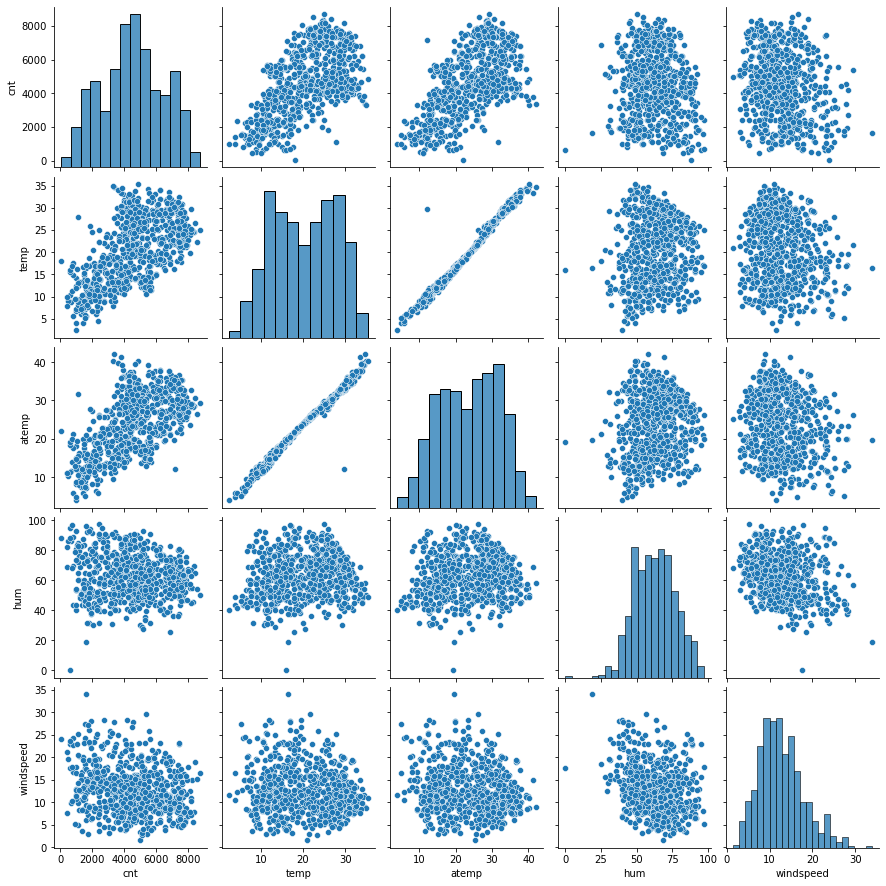

In [19]:
# Understanding via graph how the continuous variables are impact the cnt target variable
plt.figure(figsize=(10, 15))
num_variables = ['cnt', 'temp', 'atemp', 'hum', 'windspeed']
sns.pairplot(bike_share_df, vars=num_variables)
plt.show()

# Understanding the plot 

#### temp vs atemp
 They seems like to be directly related as assumed beacause they both are temperature i.e highly cor-related, we should be removing one of the columns
 There is also seems like some good correlation with cnt vs temp or  cnt vs atemp


In [20]:
# Find out the correlation for continuous numerical variables
bike_share_df[num_variables].corr()

,cnt,temp,atemp,hum,windspeed
cnt,1.000000,0.627044,0.630685,-0.098543,-0.235132
temp,0.627044,1.000000,0.991696,0.128565,-0.158186
atemp,0.630685,0.991696,1.000000,0.141512,-0.183876
hum,-0.098543,0.128565,0.141512,1.000000,-0.248506
windspeed,-0.235132,-0.158186,-0.183876,-0.248506,1.000000


## Step 2

### Data visualization and understanding the data more
*  Lets' visualize the data using the matplotlib and seaborn

<AxesSubplot:>

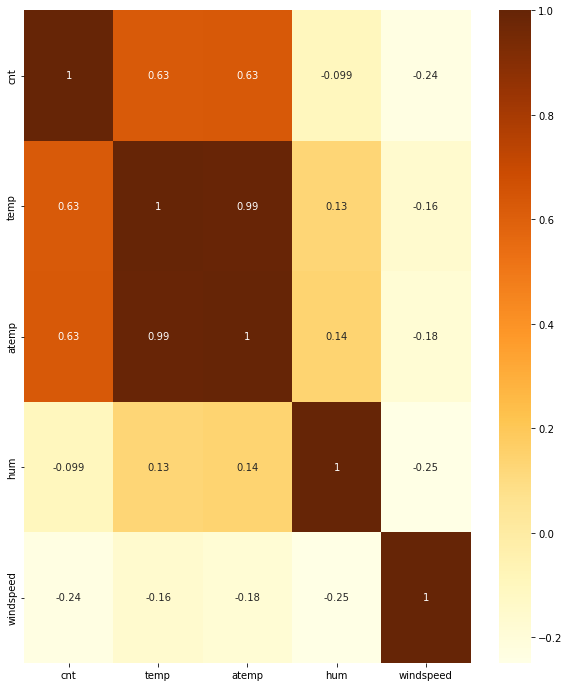

In [21]:
plt.figure(figsize=(10,12))
sns.heatmap(bike_share_df[num_variables].corr(), annot=True, cmap='YlOrBr' )

### Like above graph shows there is 99% correlation between temp and atemp

<AxesSubplot:>

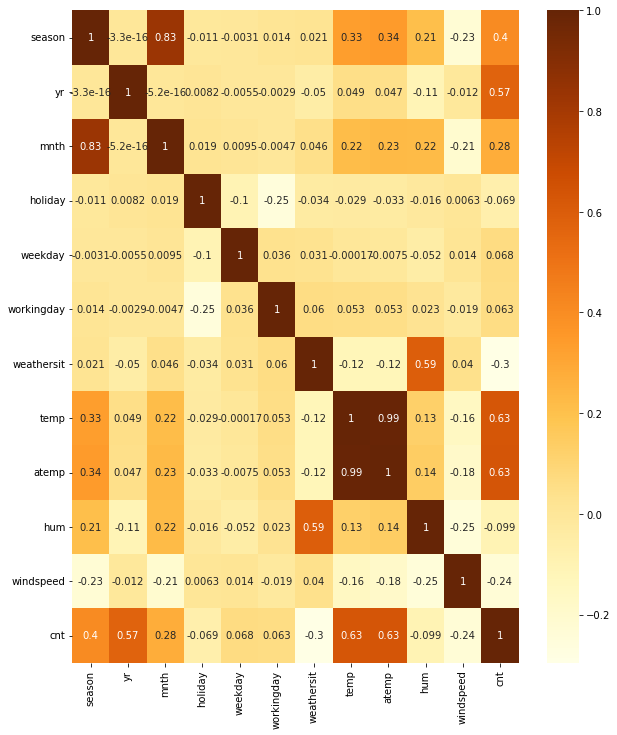

In [22]:
# Plot the heatmap of all the variables 
plt.figure(figsize=(10,12))
sns.heatmap(bike_share_df.corr(), annot=True, cmap='YlOrBr' )

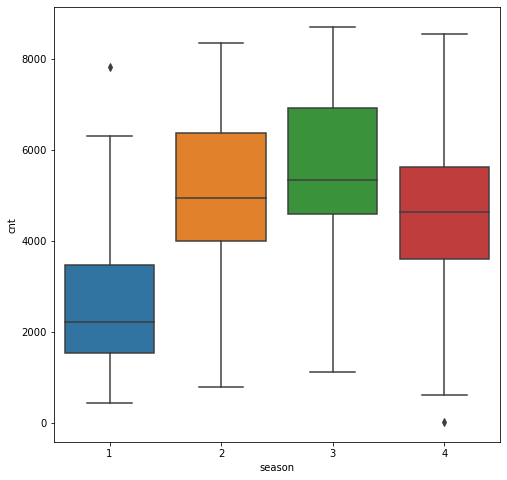

In [23]:
#  season, yr, weathersit, mnth, holiday, weekday, workingday

# Plot graph between the categorical values and lets understand the how data looks like for categorical type

# season (1:spring, 2:summer, 3:fall, 4:winter)

plt.figure(figsize=(8,8))

sns.boxplot(data=bike_share_df, x='season', y='cnt')

plt.show()

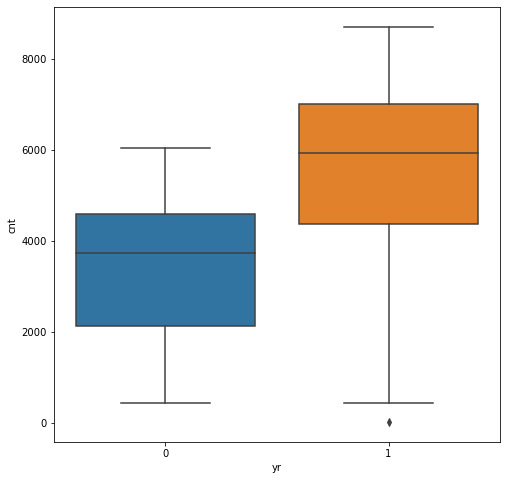

In [24]:
# year (0: 2018, 1:2019)

plt.figure(figsize=(8,8))

sns.boxplot(data=bike_share_df, x='yr', y='cnt')

plt.show()

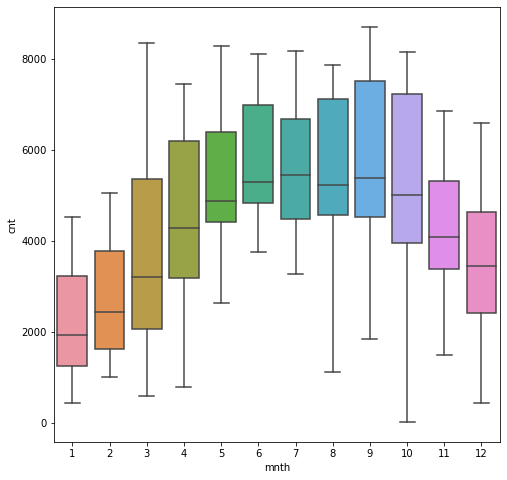

In [25]:
# month ( 1 to 12)  1 for Jan to 12 for Dec

plt.figure(figsize=(8,8))

sns.boxplot(data=bike_share_df, x='mnth', y='cnt')

plt.show()

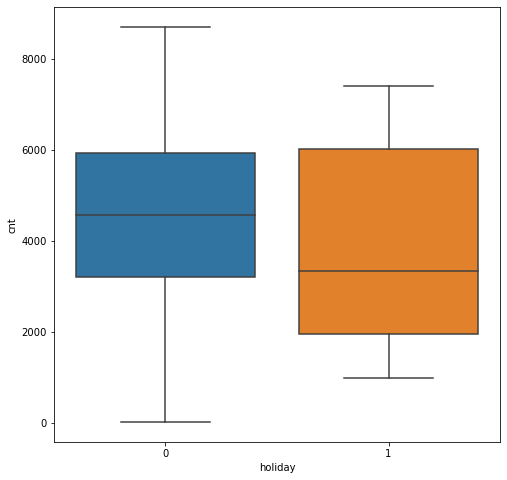

In [26]:
# O means no holiday, 1 means holiday
plt.figure(figsize=(8,8))

sns.boxplot(data=bike_share_df, x='holiday', y='cnt')

plt.show()

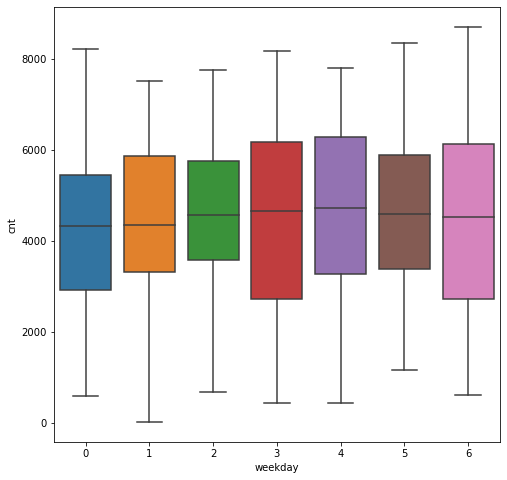

In [27]:
# Working dat from 0 to 6. Assuming 0 means Sunday and 6 being Saturday

plt.figure(figsize=(8,8))

sns.boxplot(data=bike_share_df, x='weekday', y='cnt')

plt.show()

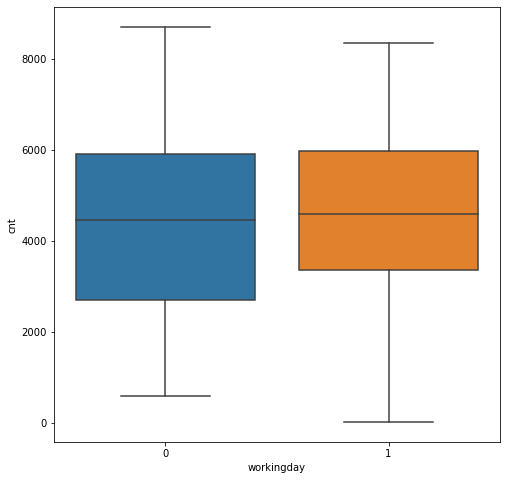

In [28]:
# Working day 1 holiday 0

plt.figure(figsize=(8,8))

sns.boxplot(data=bike_share_df, x='workingday', y='cnt')

plt.show()

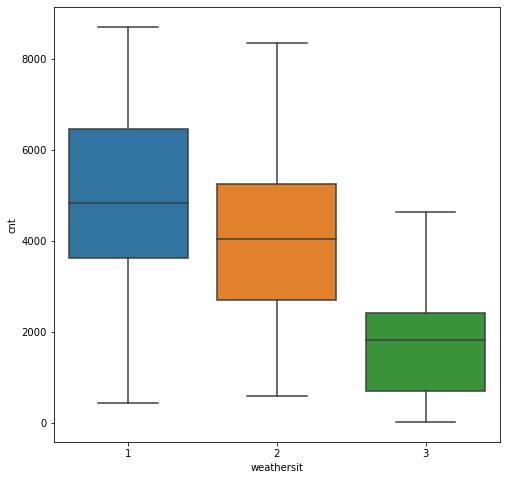

In [29]:
# 	      Weathersit : 
# 		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy ----> Good
# 		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ----> Average 
# 		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds ----> Bad 
# 		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog ---->  Very Bad

plt.figure(figsize=(8,8))

sns.boxplot(data=bike_share_df, x='weathersit', y='cnt')

plt.show()

###  Analysis of above graph 

- Season 3 alias Fall has seen more demands for bike as compared to other seasons
- Year 1 alias 2019 has seen more demands that previous year
- Bike demands show some pattern while anaysis monthly demands. The demands increasing from Jan to June and then some decline and then highest in *September* and then demand continues to decrease
- Working day has more demands for bike than holidays
- There are random demands in weekdays 
- Again, workingday seems to have more demands for bike than holidays or weekends 
    - Here one thing to ponder over is that column holiday seems to be subset of workingday(includes both weekends and holidays) The moot point is can we remove this 'holiday' column ?
- There is highest demand for bike when weathersit is 1 means clear sky or Good weather and demands tend to decrease as weather
  tends to detoriate and not demands when weathersit is 4 or very bad weather.

In [30]:
# We have some initial analysis and it seems like we can move for Linear Regression 

# We already have categorical values like season, weather etc so next thing we need 
# to do is get dummy variables since some categorical values have more than two levels

# season 

new_season = pd.get_dummies(bike_share_df['season'])

new_season.head()

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [31]:
# Here Readiability is not that much visible and since other categorical also has same numerical category starts with 1, 2..
# so on let's convert them to have some meaningful columns 

bike_share_df.season.replace({1:"season_spring", 2:"season_summer", 3:"season_fall", 4:"season_winter"}, inplace = True)

# Giving one word for weathers
bike_share_df.weathersit.replace({1:'weather_good',2:'weather_average',3:'weather_bad',4:'weather_very_bad'}, inplace = True)

bike_share_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar', 4: 'apr',5: 'may',6: 'jun',
                  7: 'jul', 8: 'aug', 9: 'sept', 10: 'oct',11: 'nov',12: 'dec'},  inplace = True)

bike_share_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'}, inplace = True)

bike_share_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,season_spring,0,jan,0,sat,0,weather_average,14.110847,18.18125,80.5833,10.749882,985
1,season_spring,0,jan,0,sun,0,weather_average,14.902598,17.68695,69.6087,16.652113,801
2,season_spring,0,jan,0,mon,1,weather_good,8.050924,9.47025,43.7273,16.636703,1349
3,season_spring,0,jan,0,tue,1,weather_good,8.200000,10.60610,59.0435,10.739832,1562
4,season_spring,0,jan,0,wed,1,weather_good,9.305237,11.46350,43.6957,12.522300,1600


In [32]:
# Now lets see how dummy variables look like
new_season = pd.get_dummies(bike_share_df['season'])

new_season.head()


,season_fall,season_spring,season_summer,season_winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [33]:
# Let's drop the columns after getting the dummy variables using 'drop_first=True'

new_season = pd.get_dummies(bike_share_df['season'])

# concatenate the dummy variables to main data frame

bike_share_df = pd.concat([bike_share_df, new_season], axis = 1)

bike_share_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,season_winter
0,season_spring,0,jan,0,sat,0,weather_average,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0
1,season_spring,0,jan,0,sun,0,weather_average,14.902598,17.68695,69.6087,16.652113,801,0,1,0,0
2,season_spring,0,jan,0,mon,1,weather_good,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,0
3,season_spring,0,jan,0,tue,1,weather_good,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,0
4,season_spring,0,jan,0,wed,1,weather_good,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,0


In [34]:
# Lets drop season since we have added the dummies for the same

bike_share_df.drop(['season'], axis = 1, inplace = True)

bike_share_df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,season_winter
0,0,jan,0,sat,0,weather_average,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0
1,0,jan,0,sun,0,weather_average,14.902598,17.68695,69.6087,16.652113,801,0,1,0,0
2,0,jan,0,mon,1,weather_good,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,0
3,0,jan,0,tue,1,weather_good,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,0
4,0,jan,0,wed,1,weather_good,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,0


In [35]:
# Get Dummies for other categorical variables having levels 
bike_share_df = pd.get_dummies(data=bike_share_df, columns=["mnth", "weekday"], drop_first=True)
bike_share_df.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_fall,...,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
0,0,0,0,weather_average,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,weather_average,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,weather_good,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,weather_good,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,weather_good,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
bike_share_df.columns

Index(['yr', 'holiday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'season_fall', 'season_spring', 'season_summer',
       'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed'],
      dtype='object')

In [37]:
# Now lets see how dummy variables look like for weathersit. So, here is no data for Very Bad Weather and if we 
# drop_first=True then we will loose one column which is incorrect hence do not use drop_first=True
new_weathersit = pd.get_dummies(bike_share_df['weathersit'])
new_weathersit.head()


,weather_average,weather_bad,weather_good
0,1,0,0
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [38]:
bike_share_df = pd.concat([bike_share_df, new_weathersit], axis = 1)
bike_share_df.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_fall,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weather_average,weather_bad,weather_good
0,0,0,0,weather_average,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,1,0,0,0,0,1,0,0
1,0,0,0,weather_average,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,1,weather_good,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0,1,weather_good,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,1,weather_good,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,0,0,0,0,1,0,0,1


In [39]:
# Drop weathersit since added the dummy for the same
bike_share_df.drop(['weathersit'], axis = 1, inplace = True)

In [40]:
bike_share_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_fall', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weather_average', 'weather_bad',
       'weather_good'],
      dtype='object')

In [41]:
bike_share_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_fall,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weather_average,weather_bad,weather_good
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.257534,0.246575,...,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.336986,0.028767,0.634247
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.437576,0.431313,...,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.473004,0.167266,0.481971
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
bike_share_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_fall,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weather_average,weather_bad,weather_good
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,1,0,0,0,0,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,...,0,0,0,1,0,0,0,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,1,...,0,1,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,...,0,0,0,0,0,1,0,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,1,...,0,0,0,0,0,0,1,0,0,1


In [43]:
#Drop atemp since temp and atemp are highly cor-related added the dummy for the same
# bike_share_df.drop(['temp'], axis = 1, inplace = True)
# bike_share_df.head()

In [44]:
bike_share_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_fall', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weather_average', 'weather_bad',
       'weather_good'],
      dtype='object')

#  Model Building Process

###  Split Data into training and test set

In [45]:
bike_share_df.shape

(730, 32)

###  Rescaling the feature since there are some varables like hum, windspeed has high values as compared to other variables 

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [47]:
# Before Scaling applies
bike_share_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_fall,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weather_average,weather_bad,weather_good
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,1,0,0,0,0,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,...,0,0,0,1,0,0,0,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,1,...,0,1,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,...,0,0,0,0,0,1,0,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,1,...,0,0,0,0,0,0,1,0,0,1


In [48]:
bike_share_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   atemp            730 non-null    float64
 5   hum              730 non-null    float64
 6   windspeed        730 non-null    float64
 7   cnt              730 non-null    int64  
 8   season_fall      730 non-null    uint8  
 9   season_spring    730 non-null    uint8  
 10  season_summer    730 non-null    uint8  
 11  season_winter    730 non-null    uint8  
 12  mnth_aug         730 non-null    uint8  
 13  mnth_dec         730 non-null    uint8  
 14  mnth_feb         730 non-null    uint8  
 15  mnth_jan         730 non-null    uint8  
 16  mnth_jul         730 non-null    uint8  
 17  mnth_jun        

In [49]:
# all other variables is our X
X = bike_share_df
    
# Train Test split into 70:30 ratio
np.random.seed(0)
X_train, X_test = train_test_split(bike_share_df, train_size=0.7, test_size=0.3, random_state=100)

In [50]:
# Apply scaler() to all the columns except the  columns having 0 and 1 and 'dummy' variables
num_vars = ['atemp', 'temp', 'hum', 'windspeed', 'cnt']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

# After scaling the features
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_fall,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weather_average,weather_bad,weather_good
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,1,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,1,0,...,0,0,0,0,0,1,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,...,0,0,1,0,0,0,0,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,1,0,0,0,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,0,1,0,0,0,0,1,0,0


In [51]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_fall,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weather_average,weather_bad,weather_good
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,1,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,1,0,...,0,0,0,0,0,1,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,...,0,0,1,0,0,0,0,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,1,0,0,0,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,0,1,0,0,0,0,1,0,0


In [52]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_fall,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weather_average,weather_bad,weather_good
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,1,0,...,0,1,0,0,0,0,0,1,0,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,0,...,0,0,0,0,0,0,1,0,0,1
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,0,0,1,0,0,1,0,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,1,0,...,0,0,0,0,0,0,1,0,0,1
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,0,...,0,0,0,0,1,0,0,0,0,1


In [53]:
# X_test, y_train, y_test

y_train = X_train.pop('cnt')

In [54]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_fall,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weather_average,weather_bad,weather_good
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.262745,0.243137,0.245098,...,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412,0.627451
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.440557,0.429398,0.430568,...,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124,0.483958
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
print("X training set")
print(X_train.head())
print("y training set")
print(y_train.head())

X training set
     yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   

     season_fall  season_spring  season_summer  ...  mnth_sept  weekday_mon  \
653            0              0              0  ...          0            0   
576            1              0              0  ...          0            0   
426            0              1              0  ...          0            0   
728            0              1              0  ...          0            0   
482            0              0              1  ...          0            0   

     weekday_sat  weekday_sun  weekday_thu  weekday_tue  weekday_wed  \

#  Building Model using RFE 

In [56]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [57]:
# Running RFE with output variables say 15

rfe = RFE(lr, n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [58]:
# Number of columns selected by RFE and their weights
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 10),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_fall', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 9),
 ('mnth_dec', False, 6),
 ('mnth_feb', False, 7),
 ('mnth_jan', False, 4),
 ('mnth_jul', False, 3),
 ('mnth_jun', False, 16),
 ('mnth_mar', False, 17),
 ('mnth_may', False, 8),
 ('mnth_nov', False, 5),
 ('mnth_oct', False, 13),
 ('mnth_sept', False, 2),
 ('weekday_mon', False, 12),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 11),
 ('weekday_wed', False, 15),
 ('weather_average', True, 1),
 ('weather_bad', True, 1),
 ('weather_good', True, 1)]

In [59]:
# columns that rfe selected for model creation 

X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_fall', 'season_spring', 'season_summer', 'season_winter',
       'weekday_sat', 'weekday_sun', 'weather_average', 'weather_bad',
       'weather_good'],
      dtype='object')

In [60]:
# colums not selected by rfe
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul',
       'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [61]:
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_fall', 'season_spring', 'season_summer', 'season_winter',
       'weekday_sat', 'weekday_sun', 'weather_average', 'weather_bad',
       'weather_good']]

In [62]:
X_train_rfe.shape

(510, 15)

In [63]:
X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_fall', 'season_spring', 'season_summer', 'season_winter',
       'weekday_sat', 'weekday_sun', 'weather_average', 'weather_bad',
       'weather_good'],
      dtype='object')

In [64]:
X_train_rfe.describe()

,yr,holiday,workingday,temp,hum,windspeed,season_fall,season_spring,season_summer,season_winter,weekday_sat,weekday_sun,weather_average,weather_bad,weather_good
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.262745,0.243137,0.245098,0.24902,0.154902,0.143137,0.343137,0.029412,0.627451
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.440557,0.429398,0.430568,0.43287,0.362166,0.350557,0.475223,0.169124,0.483958
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


### First Model based on feature selection by RFE 

In [65]:
# First Model Creation based on feature selection using the RFE approach

X_train_lm1 = sm.add_constant(X_train_rfe)

lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [66]:
lr1.params

const              0.093351
yr                 0.231039
holiday           -0.036843
workingday         0.055843
temp               0.494867
hum               -0.127590
windspeed         -0.181197
season_fall        0.008652
season_spring     -0.065060
season_summer      0.051236
season_winter      0.098524
weekday_sat        0.065367
weekday_sun        0.008984
weather_average    0.075825
weather_bad       -0.115972
weather_good       0.133497
dtype: float64

In [67]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.7
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          2.13e-184
Time:                        21:32:10   Log-Likelihood:                 495.00
No. Observations:                 510   AIC:                            -964.0
Df Residuals:                     497   BIC:                            -909.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0934      0.019      4.848      0.000       0.056       0.131
yr                  0.2310      0.008     27.630      0.000       0.215       0.247
holiday            -0.0368      0.021     -1.740      0.082      -0.078       0.005
workingday          0.0558      0.009      6.302      0.000       0.038       0.073
temp                0.4949      0.034     14.508      0.000       0.428       0.562
hum                -0.1276      0.039     -3.298      0.001      -0.204      -0.052
windspeed          -0.1812      0.027     -6.836      0.000      -0.233      -0.129
season_fall         0.0087      0.013      0.645      0.519      -0.018       0.035
season_spring      -0.0651      0.010     -6.304      0.000      -0.085      -0.045
season_summer       0.0512      0.009      5.425      0.000       0.033       0.070
season_winter       0.0985      0.009     10.952      0.000       0.081       0.116
weekday_sat         0.0654      0.011      5.910      0.000       0.044       0.087
weekday_sun         0.0090      0.012      0.767      0.443      -0.014       0.032
weather_average     0.0758      0.011      7.119      0.000       0.055       0.097
weather_bad        -0.1160      0.021     -5.542      0.000      -0.157      -0.075
weather_good        0.1335      0.009     15.053      0.000       0.116       0.151
==============================================================================
Omnibus:                       70.685   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.100
Skew:                          -0.699   Prob(JB):                     2.87e-40
Kurtosis:                       5.572   Cond. No.                     1.71e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.95e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [68]:
# Calculate the VIF 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\1034495\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
1,holiday,inf
2,workingday,inf
6,season_fall,inf
7,season_spring,inf
8,season_summer,inf
9,season_winter,inf
10,weekday_sat,inf
11,weekday_sun,inf
12,weather_average,inf
13,weather_bad,inf


### Second Model after removing the 'season_fall' feature based on p-value

In [69]:
# Removing the feature season_fallhaving high p-value 

X_train_new_2 = X_train_rfe.drop(["season_fall"], axis=1)

X_train_lm2 = sm.add_constant(X_train_new_2)

lr2 = sm.OLS(y_train, X_train_lm2).fit()


In [70]:
lr2.params

const              0.098816
yr                 0.231039
holiday           -0.035477
workingday         0.057209
temp               0.494867
hum               -0.127590
windspeed         -0.181197
season_spring     -0.073713
season_summer      0.042583
season_winter      0.089872
weekday_sat        0.066733
weekday_sun        0.010351
weather_average    0.077647
weather_bad       -0.114150
weather_good       0.135319
dtype: float64

In [71]:
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.7
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          2.13e-184
Time:                        21:32:10   Log-Likelihood:                 495.00
No. Observations:                 510   AIC:                            -964.0
Df Residuals:                     497   BIC:                            -909.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0988      0.025      3.951      0.000       0.050       0.148
yr                  0.2310      0.008     27.630      0.000       0.215       0.247
holiday            -0.0355      0.022     -1.636      0.102      -0.078       0.007
workingday          0.0572      0.010      5.982      0.000       0.038       0.076
temp                0.4949      0.034     14.508      0.000       0.428       0.562
hum                -0.1276      0.039     -3.298      0.001      -0.204      -0.052
windspeed          -0.1812      0.027     -6.836      0.000      -0.233      -0.129
season_spring      -0.0737      0.020     -3.607      0.000      -0.114      -0.034
season_summer       0.0426      0.014      3.103      0.002       0.016       0.070
season_winter       0.0899      0.017      5.364      0.000       0.057       0.123
weekday_sat         0.0667      0.012      5.730      0.000       0.044       0.090
weekday_sun         0.0104      0.012      0.837      0.403      -0.014       0.035
weather_average     0.0776      0.012      6.594      0.000       0.055       0.101
weather_bad        -0.1141      0.022     -5.227      0.000      -0.157      -0.071
weather_good        0.1353      0.010     13.572      0.000       0.116       0.155
==============================================================================
Omnibus:                       70.685   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.100
Skew:                          -0.699   Prob(JB):                     2.87e-40
Kurtosis:                       5.572   Cond. No.                     3.05e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.83e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [72]:
# Calculate the VIF 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_2.values, i) for i in range(X_train_new_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\1034495\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
1,holiday,inf
2,workingday,inf
9,weekday_sat,inf
10,weekday_sun,inf
11,weather_average,inf
12,weather_bad,inf
13,weather_good,inf
6,season_spring,4.54
3,temp,3.50
8,season_winter,3.10


### Third Model after removing the  feature 'weekday_sun'  based on high p-value

In [73]:
# Removing the feature weather_good having high p-value

X_train_new_3 = X_train_new_2.drop(["weekday_sun"], axis=1)

X_train_lm3 = sm.add_constant(X_train_new_3)

lr3 = sm.OLS(y_train, X_train_lm3).fit()


In [74]:
lr3.params

const              0.106579
yr                 0.231039
holiday           -0.045827
workingday         0.046859
temp               0.494867
hum               -0.127590
windspeed         -0.181197
season_spring     -0.073713
season_summer      0.042583
season_winter      0.089872
weekday_sat        0.056382
weather_average    0.080235
weather_bad       -0.111562
weather_good       0.137907
dtype: float64

In [75]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.7
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          2.13e-184
Time:                        21:32:10   Log-Likelihood:                 495.00
No. Observations:                 510   AIC:                            -964.0
Df Residuals:                     497   BIC:                            -909.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1066      0.031      3.482      0.001       0.046       0.167
yr                  0.2310      0.008     27.630      0.000       0.215       0.247
holiday            -0.0458      0.028     -1.634      0.103      -0.101       0.009
workingday          0.0469      0.012      3.894      0.000       0.023       0.070
temp                0.4949      0.034     14.508      0.000       0.428       0.562
hum                -0.1276      0.039     -3.298      0.001      -0.204      -0.052
windspeed          -0.1812      0.027     -6.836      0.000      -0.233      -0.129
season_spring      -0.0737      0.020     -3.607      0.000      -0.114      -0.034
season_summer       0.0426      0.014      3.103      0.002       0.016       0.070
season_winter       0.0899      0.017      5.364      0.000       0.057       0.123
weekday_sat         0.0564      0.015      3.719      0.000       0.027       0.086
weather_average     0.0802      0.013      6.170      0.000       0.055       0.106
weather_bad        -0.1116      0.023     -4.826      0.000      -0.157      -0.066
weather_good        0.1379      0.011     12.847      0.000       0.117       0.159
==============================================================================
Omnibus:                       70.685   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.100
Skew:                          -0.699   Prob(JB):                     2.87e-40
Kurtosis:                       5.572   Cond. No.                     2.67e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.36e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [76]:
# Calculate the VIF 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_3.values, i) for i in range(X_train_new_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,weather_good,50.44
10,weather_average,33.52
6,season_spring,4.54
11,weather_bad,4.33
3,temp,3.50
8,season_winter,3.10
7,season_summer,2.06
4,hum,1.88
2,workingday,1.87
9,weekday_sat,1.78


### Fourth Model after removing the  feature 'holiday' high p value

In [77]:
# Removing the feature holiday having high p value

X_train_new_4 = X_train_new_3.drop(["holiday"], axis=1)

X_train_lm4 = sm.add_constant(X_train_new_4)

lr4 = sm.OLS(y_train, X_train_lm4).fit()


In [78]:
lr4.params

const              0.101136
yr                 0.231194
workingday         0.053650
temp               0.495533
hum               -0.126910
windspeed         -0.181636
season_spring     -0.074156
season_summer      0.043094
season_winter      0.089368
weekday_sat        0.063269
weather_average    0.078337
weather_bad       -0.113000
weather_good       0.135799
dtype: float64

In [79]:
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.5
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          5.24e-185
Time:                        21:32:10   Log-Likelihood:                 493.64
No. Observations:                 510   AIC:                            -963.3
Df Residuals:                     498   BIC:                            -912.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1011      0.030      3.318      0.001       0.041       0.161
yr                  0.2312      0.008     27.604      0.000       0.215       0.248
workingday          0.0536      0.011      4.743      0.000       0.031       0.076
temp                0.4955      0.034     14.504      0.000       0.428       0.563
hum                -0.1269      0.039     -3.275      0.001      -0.203      -0.051
windspeed          -0.1816      0.027     -6.842      0.000      -0.234      -0.129
season_spring      -0.0742      0.020     -3.623      0.000      -0.114      -0.034
season_summer       0.0431      0.014      3.136      0.002       0.016       0.070
season_winter       0.0894      0.017      5.326      0.000       0.056       0.122
weekday_sat         0.0633      0.015      4.338      0.000       0.035       0.092
weather_average     0.0783      0.013      6.038      0.000       0.053       0.104
weather_bad        -0.1130      0.023     -4.884      0.000      -0.158      -0.068
weather_good        0.1358      0.011     12.721      0.000       0.115       0.157
==============================================================================
Omnibus:                       75.041   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.603
Skew:                          -0.727   Prob(JB):                     1.67e-44
Kurtosis:                       5.715   Cond. No.                     2.70e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.31e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [80]:
# Calculate the VIF 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_4.values, i) for i in range(X_train_new_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,weather_good,49.65
9,weather_average,33.11
5,season_spring,4.54
10,weather_bad,4.30
2,temp,3.50
7,season_winter,3.10
6,season_summer,2.06
3,hum,1.88
1,workingday,1.65
8,weekday_sat,1.64


### Fifth Model after removing the  feature 'weather_good'  based on high VIF

In [81]:
# Removing the feature hum having high VIF

X_train_new_5 = X_train_new_4.drop(["weather_good"], axis=1)

X_train_lm5 = sm.add_constant(X_train_new_5)

lr5 = sm.OLS(y_train, X_train_lm5).fit()


In [82]:
lr5.params

const              0.236935
yr                 0.231194
workingday         0.053650
temp               0.495533
hum               -0.126910
windspeed         -0.181636
season_spring     -0.074156
season_summer      0.043094
season_winter      0.089368
weekday_sat        0.063269
weather_average   -0.057462
weather_bad       -0.248798
dtype: float64

In [83]:
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.5
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          5.24e-185
Time:                        21:32:10   Log-Likelihood:                 493.64
No. Observations:                 510   AIC:                            -963.3
Df Residuals:                     498   BIC:                            -912.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2369      0.037      6.466      0.000       0.165       0.309
yr                  0.2312      0.008     27.604      0.000       0.215       0.248
workingday          0.0536      0.011      4.743      0.000       0.031       0.076
temp                0.4955      0.034     14.504      0.000       0.428       0.563
hum                -0.1269      0.039     -3.275      0.001      -0.203      -0.051
windspeed          -0.1816      0.027     -6.842      0.000      -0.234      -0.129
season_spring      -0.0742      0.020     -3.623      0.000      -0.114      -0.034
season_summer       0.0431      0.014      3.136      0.002       0.016       0.070
season_winter       0.0894      0.017      5.326      0.000       0.056       0.122
weekday_sat         0.0633      0.015      4.338      0.000       0.035       0.092
weather_average    -0.0575      0.011     -5.283      0.000      -0.079      -0.036
weather_bad        -0.2488      0.027     -9.136      0.000      -0.302      -0.195
==============================================================================
Omnibus:                       75.041   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.603
Skew:                          -0.727   Prob(JB):                     1.67e-44
Kurtosis:                       5.715   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
# Calculate the VIF 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_5.values, i) for i in range(X_train_new_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,27.40
2,temp,15.63
1,workingday,4.71
4,windspeed,4.69
5,season_spring,3.86
7,season_winter,3.10
6,season_summer,2.28
9,weather_average,2.28
0,yr,2.08
8,weekday_sat,1.83


### Sixth Model after removing the  feature 'hum'  based on high VIF

In [85]:
# Removing the feature hum having VIF 

X_train_new_6 = X_train_new_5.drop(["hum"], axis=1)

X_train_lm6 = sm.add_constant(X_train_new_6)

lr6 = sm.OLS(y_train, X_train_lm6).fit()


In [86]:
lr6.params

const              0.170861
yr                 0.234246
workingday         0.055724
temp               0.468757
windspeed         -0.156150
season_spring     -0.081129
season_summer      0.038572
season_winter      0.078210
weekday_sat        0.066801
weather_average   -0.078237
weather_bad       -0.284259
dtype: float64

In [87]:
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.2
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          6.50e-184
Time:                        21:32:10   Log-Likelihood:                 488.20
No. Observations:                 510   AIC:                            -954.4
Df Residuals:                     499   BIC:                            -907.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1709      0.031      5.532      0.000       0.110       0.232
yr                  0.2342      0.008     27.873      0.000       0.218       0.251
workingday          0.0557      0.011      4.887      0.000       0.033       0.078
temp                0.4688      0.033     13.995      0.000       0.403       0.535
windspeed          -0.1562      0.026     -6.093      0.000      -0.207      -0.106
season_spring      -0.0811      0.021     -3.947      0.000      -0.122      -0.041
season_summer       0.0386      0.014      2.794      0.005       0.011       0.066
season_winter       0.0782      0.017      4.715      0.000       0.046       0.111
weekday_sat         0.0668      0.015      4.548      0.000       0.038       0.096
weather_average    -0.0782      0.009     -8.769      0.000      -0.096      -0.061
weather_bad        -0.2843      0.025    -11.267      0.000      -0.334      -0.235
==============================================================================
Omnibus:                       73.331   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.939
Skew:                          -0.718   Prob(JB):                     1.27e-42
Kurtosis:                       5.649   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
# Calculate the VIF 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new_6.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_6.values, i) for i in range(X_train_new_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.27
1,workingday,4.64
3,windspeed,4.63
4,season_spring,2.25
0,yr,2.07
5,season_summer,1.87
7,weekday_sat,1.83
6,season_winter,1.74
8,weather_average,1.55
9,weather_bad,1.08


### Seventh Model after removing the  feature 'season_summer'  based on high p-value

In [89]:
# Removing the feature season_summer having slightly high p-value

X_train_new_7 = X_train_new_6.drop(["season_summer"], axis=1)

X_train_lm7 = sm.add_constant(X_train_new_7)

lr7 = sm.OLS(y_train, X_train_lm7).fit()


In [90]:
lr7.params

const              0.218783
yr                 0.235147
workingday         0.055723
temp               0.421688
windspeed         -0.146325
season_spring     -0.119261
season_winter      0.048025
weekday_sat        0.066232
weather_average   -0.077753
weather_bad       -0.286939
dtype: float64

In [91]:
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     263.5
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.85e-183
Time:                        21:32:10   Log-Likelihood:                 484.25
No. Observations:                 510   AIC:                            -948.5
Df Residuals:                     500   BIC:                            -906.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2188      0.026      8.462      0.000       0.168       0.270
yr                  0.2351      0.008     27.812      0.000       0.219       0.252
workingday          0.0557      0.011      4.854      0.000       0.033       0.078
temp                0.4217      0.029     14.469      0.000       0.364       0.479
windspeed          -0.1463      0.026     -5.725      0.000      -0.197      -0.096
season_spring      -0.1193      0.015     -7.708      0.000      -0.150      -0.089
season_winter       0.0480      0.013      3.789      0.000       0.023       0.073
weekday_sat         0.0662      0.015      4.480      0.000       0.037       0.095
weather_average    -0.0778      0.009     -8.658      0.000      -0.095      -0.060
weather_bad        -0.2869      0.025    -11.305      0.000      -0.337      -0.237
==============================================================================
Omnibus:                       73.225   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.870
Skew:                          -0.716   Prob(JB):                     1.31e-42
Kurtosis:                       5.650   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
# Calculate the VIF 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new_7.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_7.values, i) for i in range(X_train_new_7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.26
1,workingday,4.44
3,windspeed,4.03
0,yr,2.06
4,season_spring,1.81
6,weekday_sat,1.79
7,weather_average,1.52
5,season_winter,1.43
8,weather_bad,1.08


### Eigth Model after removing the  feature 'temp' based on high VIF

In [93]:
# Removing the feature temp having high VIF

X_train_new_8 = X_train_new_7.drop(["temp"], axis=1)

X_train_lm8 = sm.add_constant(X_train_new_8)

lr8 = sm.OLS(y_train, X_train_lm8).fit()


In [94]:
lr8.params

const              0.527356
yr                 0.247944
workingday         0.056757
windspeed         -0.201008
season_spring     -0.283750
season_winter     -0.057531
weekday_sat        0.064574
weather_average   -0.092205
weather_bad       -0.292973
dtype: float64

In [95]:
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     190.9
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          8.80e-147
Time:                        21:32:10   Log-Likelihood:                 395.06
No. Observations:                 510   AIC:                            -772.1
Df Residuals:                     501   BIC:                            -734.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5274      0.017     30.318      0.000       0.493       0.562
yr                  0.2479      0.010     24.781      0.000       0.228       0.268
workingday          0.0568      0.014      4.155      0.000       0.030       0.084
windspeed          -0.2010      0.030     -6.683      0.000      -0.260      -0.142
season_spring      -0.2838      0.012    -22.721      0.000      -0.308      -0.259
season_winter      -0.0575      0.012     -4.666      0.000      -0.082      -0.033
weekday_sat         0.0646      0.018      3.671      0.000       0.030       0.099
weather_average    -0.0922      0.011     -8.682      0.000      -0.113      -0.071
weather_bad        -0.2930      0.030     -9.702      0.000      -0.352      -0.234
==============================================================================
Omnibus:                       35.245   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.922
Skew:                          -0.427   Prob(JB):                     1.78e-15
Kurtosis:                       4.570   Cond. No.                         9.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
# Calculate the VIF 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new_8.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_8.values, i) for i in range(X_train_new_8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.42
1,workingday,3.01
0,yr,1.86
6,weather_average,1.51
5,weekday_sat,1.50
3,season_spring,1.48
4,season_winter,1.39
7,weather_bad,1.08


### Creating the Ninth Model and try to add atem or temp to bring back the model efficiency 

In [97]:
# Bring back the atemp just to see if it improves the models without impacting the VIF. Since atemp and temp is highly correlated we can try this.
# The model will surely improves which has come down to 75% from 82% after removing the 'temp' feature

X_train_new_8["atemp"] = X_train["atemp"]

X_train_new_9 = X_train_new_8

X_train_lm9 = sm.add_constant(X_train_new_9)

lr9 = sm.OLS(y_train, X_train_lm9).fit()


In [98]:
lr9.params

const              0.219638
yr                 0.235978
workingday         0.055594
windspeed         -0.133257
season_spring     -0.124766
season_winter      0.040459
weekday_sat        0.066162
weather_average   -0.078400
weather_bad       -0.282551
atemp              0.437637
dtype: float64

In [99]:
lr9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     259.9
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          3.06e-182
Time:                        21:32:10   Log-Likelihood:                 481.37
No. Observations:                 510   AIC:                            -942.7
Df Residuals:                     500   BIC:                            -900.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2196      0.026      8.384      0.000       0.168       0.271
yr                  0.2360      0.008     27.769      0.000       0.219       0.253
workingday          0.0556      0.012      4.816      0.000       0.033       0.078
windspeed          -0.1333      0.026     -5.152      0.000      -0.184      -0.082
season_spring      -0.1248      0.015     -8.106      0.000      -0.155      -0.095
season_winter       0.0405      0.013      3.236      0.001       0.016       0.065
weekday_sat         0.0662      0.015      4.450      0.000       0.037       0.095
weather_average    -0.0784      0.009     -8.684      0.000      -0.096      -0.061
weather_bad        -0.2826      0.026    -11.066      0.000      -0.333      -0.232
atemp               0.4376      0.031     14.192      0.000       0.377       0.498
==============================================================================
Omnibus:                       74.816   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.688
Skew:                          -0.727   Prob(JB):                     4.35e-44
Kurtosis:                       5.699   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
# Calculate the VIF 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new_9.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_9.values, i) for i in range(X_train_new_9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,atemp,5.21
1,workingday,4.45
2,windspeed,3.97
0,yr,2.05
5,weekday_sat,1.79
3,season_spring,1.78
6,weather_average,1.52
4,season_winter,1.41
7,weather_bad,1.08


### Creating Tenth Model removing season_winter having slightly high p-value

In [101]:
# Removing the feature season_winter having slightly high p-value

X_train_new_10 = X_train_new_9.drop(["season_winter"], axis=1)

X_train_lm10 = sm.add_constant(X_train_new_10)

lr10 = sm.OLS(y_train, X_train_lm10).fit()


In [102]:
lr10.params

const              0.270217
yr                 0.236878
workingday         0.053178
windspeed         -0.144935
season_spring     -0.153801
weekday_sat        0.064660
weather_average   -0.079006
weather_bad       -0.275870
atemp              0.382515
dtype: float64

In [103]:
lr10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     285.7
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          3.08e-181
Time:                        21:32:10   Log-Likelihood:                 476.09
No. Observations:                 510   AIC:                            -934.2
Df Residuals:                     501   BIC:                            -896.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2702      0.021     12.733      0.000       0.229       0.312
yr                  0.2369      0.009     27.630      0.000       0.220       0.254
workingday          0.0532      0.012      4.573      0.000       0.030       0.076
windspeed          -0.1449      0.026     -5.606      0.000      -0.196      -0.094
season_spring      -0.1538      0.013    -12.183      0.000      -0.179      -0.129
weekday_sat         0.0647      0.015      4.310      0.000       0.035       0.094
weather_average    -0.0790      0.009     -8.671      0.000      -0.097      -0.061
weather_bad        -0.2759      0.026    -10.739      0.000      -0.326      -0.225
atemp               0.3825      0.026     14.741      0.000       0.332       0.433
==============================================================================
Omnibus:                       63.116   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.214
Skew:                          -0.650   Prob(JB):                     1.46e-33
Kurtosis:                       5.330   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
# Calculate the VIF 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new_10.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_10.values, i) for i in range(X_train_new_10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,atemp,5.12
1,workingday,4.28
2,windspeed,3.84
0,yr,2.03
4,weekday_sat,1.74
3,season_spring,1.62
5,weather_average,1.50
6,weather_bad,1.07


#####  The model looks good with all the p-values are 0 and VIF for given features less than 5 except that of atemp. In previous step we wanted to minimize the VIF hence removed the temp but that drastically reduces model efficiency. Hence let's try out with atemp which is highly correlated with temp or we can even bring back the temp.

###### All the coefficients are non zero which means We reject the NULL Hypothesis

#####  Higher the F-statistics higher more significant the Model is.
    - F-statistics:  285.7
    - Prob (F-statistic): 3.08e-181

# Residual Analysis of the train data

In [105]:
y_train_predict = lr10.predict(X_train_lm10)

C:\Users\1034495\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

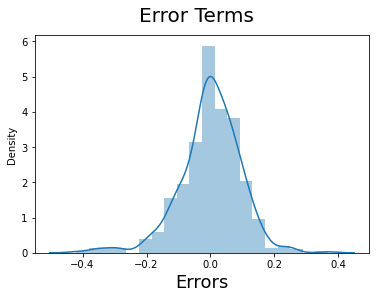

In [106]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

In [107]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_predict)

0.8202132438004388

- The error are normally distributed with mean 0 hence our assumptions is right

### Predict the values for test data set

In [108]:
scaler.feature_names_in_

array(['atemp', 'temp', 'hum', 'windspeed', 'cnt'], dtype=object)

In [109]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_fall,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weather_average,weather_bad,weather_good
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,1,0,...,0,1,0,0,0,0,0,1,0,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,0,...,0,0,0,0,0,0,1,0,0,1
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,0,0,1,0,0,1,0,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,1,0,...,0,0,0,0,0,0,1,0,0,1
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,0,...,0,0,0,0,1,0,0,0,0,1


In [110]:
num_vars = ['atemp', 'temp', 'hum', 'windspeed', 'cnt']

X_test[num_vars] = scaler.transform(X_test[num_vars])


In [111]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_fall,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weather_average,weather_bad,weather_good
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,1,0,...,0,1,0,0,0,0,0,1,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,0,0,1,0,0,1
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,1,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,1,0,0,1
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,0,0,1,0,0,0,0,1


In [112]:
X_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_fall,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weather_average,weather_bad,weather_good
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.246575,0.255708,...,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.319635,0.027397,0.652968
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.432005,0.437258,...,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.467403,0.163612,0.477117
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [113]:
y_test = X_test.pop('cnt')
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               219 non-null    int64  
 1   holiday          219 non-null    int64  
 2   workingday       219 non-null    int64  
 3   temp             219 non-null    float64
 4   atemp            219 non-null    float64
 5   hum              219 non-null    float64
 6   windspeed        219 non-null    float64
 7   season_fall      219 non-null    uint8  
 8   season_spring    219 non-null    uint8  
 9   season_summer    219 non-null    uint8  
 10  season_winter    219 non-null    uint8  
 11  mnth_aug         219 non-null    uint8  
 12  mnth_dec         219 non-null    uint8  
 13  mnth_feb         219 non-null    uint8  
 14  mnth_jan         219 non-null    uint8  
 15  mnth_jul         219 non-null    uint8  
 16  mnth_jun         219 non-null    uint8  
 17  mnth_mar       

In [114]:
# Selecting all the columnns that are part of final model

X_train_new_10.columns

Index(['yr', 'workingday', 'windspeed', 'season_spring', 'weekday_sat',
       'weather_average', 'weather_bad', 'atemp'],
      dtype='object')

In [115]:
X_train_new_10.head()

,yr,workingday,windspeed,season_spring,weekday_sat,weather_average,weather_bad,atemp
653,1,1,0.300794,0,0,0,0,0.501133
576,1,1,0.264686,0,0,0,0,0.766351
426,1,0,0.255342,1,1,1,0,0.438975
728,1,0,0.663106,1,0,0,0,0.200348
482,1,0,0.188475,0,1,1,0,0.391735


In [116]:
test_cols = ['yr', 'workingday', 'windspeed', 'season_spring', 'weekday_sat',
       'weather_average', 'weather_bad', 'atemp']

X_test[test_cols]

,yr,workingday,windspeed,season_spring,weekday_sat,weather_average,weather_bad,atemp
184,0,0,0.084219,0,0,1,0,0.769660
535,1,1,0.153728,0,0,0,0,0.842587
299,0,1,0.334206,0,0,1,0,0.496145
221,0,1,0.339570,0,0,0,0,0.795343
152,0,1,0.537414,0,0,0,0,0.741471
...,...,...,...,...,...,...,...,...
400,1,0,0.287411,1,0,1,0,0.243430
702,1,1,0.283397,0,0,0,0,0.511907
127,0,0,0.069510,0,0,0,0,0.577380
640,1,1,0.052115,0,0,1,0,0.682653


In [117]:
X_test = X_test[test_cols]

X_test_lm9 = sm.add_constant(X_test)

In [118]:
y_test_pred = lr10.predict(X_test_lm9)

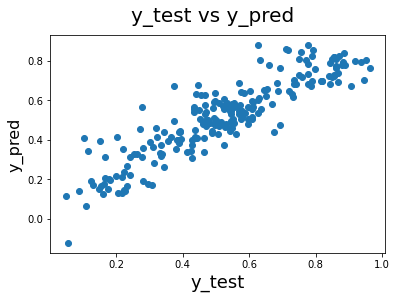

In [119]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [120]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7987111360507716

###  Model Equation and Conclusion 

* The equation for best fitted model based on lr10:
       
    - cnt = 0.2702 + (0.2369 * yr ) + (0.0532 * workingday) + (-0.1449 * windspeed) + (-0.1538 * season_spring) + (0.0647 * weekday_sat) + (-0.0790 * weather_average) + (-0.2759 * weather_bad) + (0.3825 * atemp)
     

###  Final Conclusion 

- Company should focus on Workingday, temperature that people are feeling i.e feel tempearture or atemp. As the demands increase on these days.
- The demand for bike increased by year on year. Please keep focus on this as well.
- On some saturdays the demand may increase.
- The varibles Spring season, Windspeed, bad weather etc should be properly taken into consideration because the demand may drop for these conditions.